# 4. Modeling

In [1]:
# Import the required packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Set visual style for plots
plt.style.use('seaborn')

In [3]:
# Import pre-processed dataset and load it into a dataframe

# Create path variables
scaled_file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-3/data/processed/preprocessed.csv'
original_file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-3/data/processed/non_preprocessed.csv'

# Load csv in dataframe
df = pd.read_csv(scaled_file, index_col=0)
dfo = pd.read_csv(original_file, index_col=0)

In [4]:
# Check # of columns and rows imported
df.shape

(15710, 91)

In [5]:
# Check # of columns and rows imported
dfo.shape

(15710, 27)

## Dimensionality reduction

In [6]:
x_cols = df.to_numpy()

Finding the optimal number of components for PCA

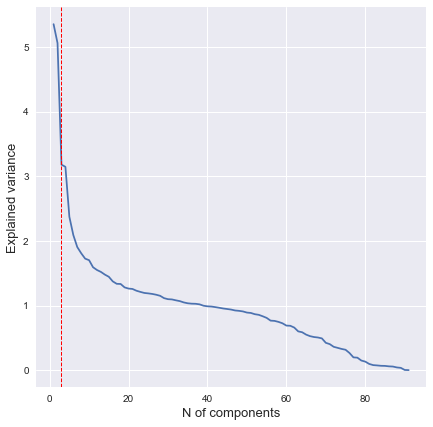

In [7]:
# Initialize a new PCA model with a default number of components.
pca = PCA()
pca.fit(x_cols)

# Compute the explained variance by component
explained_variance = pca.explained_variance_

# Plot explained variance
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(1,92,1), explained_variance)
plt.xlabel('N of components', fontsize=13)
plt.ylabel('Explained variance', fontsize=13)
plt.axvline(x=3, c='red', ls='--', lw=1)
plt.show()

In [8]:
pca = PCA(n_components=3)
x_15cols = pca.fit_transform(x_cols)

## K-Means Clustering

### K Selection: 

__a. The Elbow Method and Silhouette Score Method__

In [9]:
iner = []
sil = []

for i in range(2, 7):
    kmeans = KMeans(n_clusters=i).fit(x_15cols)
    iner.append(kmeans.inertia_)

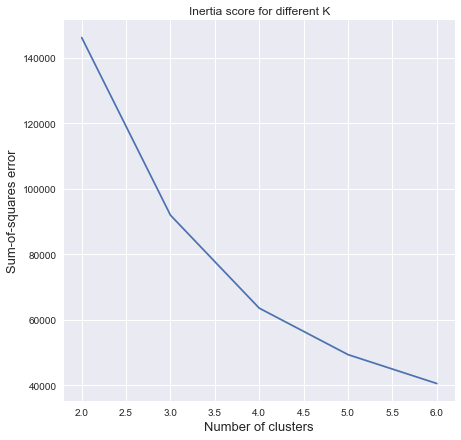

In [10]:
xs = np.arange(2, 7, 1)

fig, ax1 = plt.subplots(figsize=(7,7))
ax1.plot(xs, iner)
ax1.set_title('Inertia score for different K')
ax1.set_xlabel('Number of clusters', fontsize=13)
ax1.set_ylabel('Sum-of-squares error', fontsize=13)

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3952604404156688
For n_clusters = 3 The average silhouette_score is : 0.4483868061076373
For n_clusters = 4 The average silhouette_score is : 0.4719669823019548
For n_clusters = 5 The average silhouette_score is : 0.48727387395713473
For n_clusters = 6 The average silhouette_score is : 0.4147324477107239


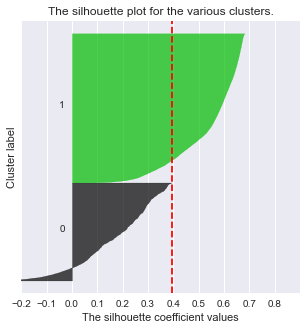

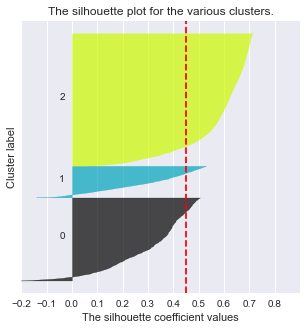

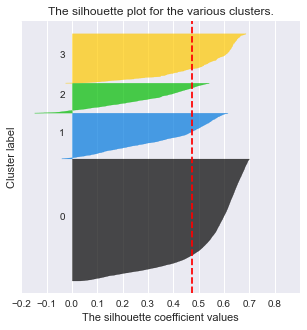

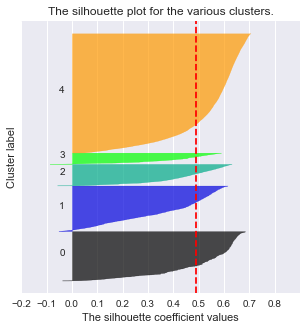

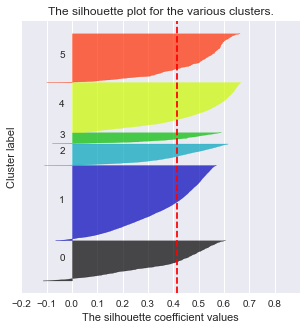

In [11]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(figsize=(5,5))

    # The silhouette coefficient can range from -1, 1 but in this case all lie within [-0.2, 0.9]
    ax1.set_xlim([-0.2, 0.9])
    ax1.margins(0.05)

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(x_15cols)

    # The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(x_15cols, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_15cols, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    
plt.show()

__b. Clusters visualization with t-SNE__

In [ ]:
t_sne = TSNE(learning_rate=10, n_jobs=-1)
transformed = t_sne.fit_transform(x_15cols)
xs = transformed[:,0]
ys = transformed[:,1]

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(xs, ys, s=5, marker='o')
plt.show()

__Cluster size__

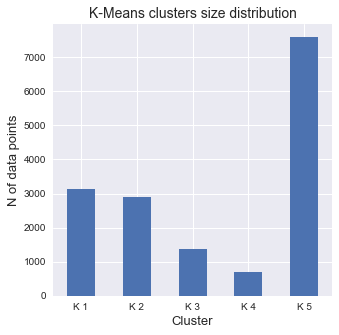

In [12]:
# Initializes the model with selected K, fit and predict the labels for the dataset
kmeans = KMeans(n_clusters=5, random_state=42).fit(x_15cols)
labels_km = kmeans.predict(x_15cols)

kmeans_df = pd.DataFrame(labels_km, columns=['cluster_id'])

# Create plot
fig = plt.figure(figsize=(5, 5))
kmeans_df.value_counts().sort_index().plot.bar()
plt.xlabel('Cluster', fontsize=13)
plt.title('K-Means clusters size distribution', fontsize=14)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2,3,4], labels=['K 1','K 2','K 3','K 4','K 5'], rotation=0)
plt.show()

In [13]:
# Calculates silhouette score for clusters
silhouette_km = silhouette_score(x_15cols, labels_km)

### Comparing performance of different algorithms tested

__Agglomerative Hierarchical Clustering algorithm__

In [14]:
ac_labels = AgglomerativeClustering(n_clusters=5, linkage='complete').fit_predict(x_15cols)
silhouette_ac = silhouette_score(x_15cols, ac_labels)

agglo_df = pd.DataFrame(ac_labels, columns=['cluster_id'])

The Silhouette coefficient for the Agglomerative Hierarchical Clustering algorithm is 0.41


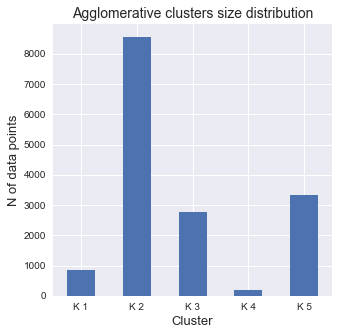

In [15]:
print('The Silhouette coefficient for the Agglomerative Hierarchical Clustering algorithm is '+str(round(silhouette_ac, 2)))

# Create plot
fig = plt.figure(figsize=(5, 5))
agglo_df.value_counts().sort_index().plot.bar()
plt.title('Agglomerative clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2,3,4], labels=['K 1','K 2','K 3','K 4','K 5'], rotation=0)
plt.show()

__DBSCAN algorithm__

In [22]:
db_labels = DBSCAN(eps=0.8).fit_predict(x_15cols)
silhouette_db = silhouette_score(x_15cols, db_labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)

dbscan_df = pd.DataFrame(db_labels, columns=['cluster_id'])

The number of clusters detected by the DBSCAN algorithm is 6
The Silhouette coefficient for the DBSCAN algorithm is 0.09


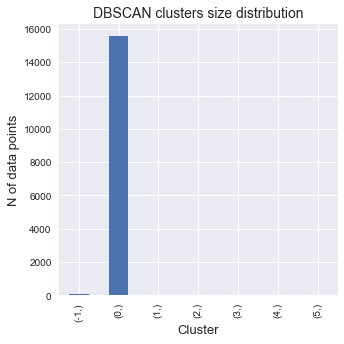

In [23]:
print('The number of clusters detected by the DBSCAN algorithm is '+str(n_clusters_))
print('The Silhouette coefficient for the DBSCAN algorithm is '+str(round(silhouette_db, 2)))

# Create plot
fig = plt.figure(figsize=(5, 5))
dbscan_df.value_counts().sort_index().plot.bar()
plt.title('DBSCAN clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
#plt.xticks(ticks=range(0,(n_clusters_+1)), labels=['Noise','K 1','K 2','K 3'], rotation=0)
           
plt.show()

__Performance comparison based on Silhouette Score__

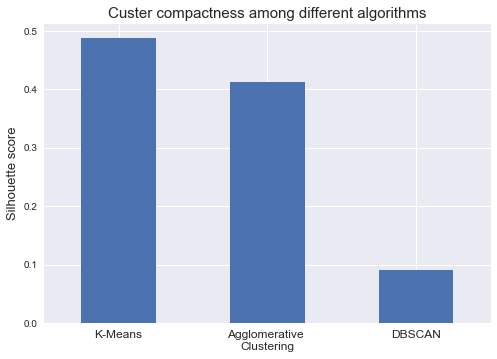

In [24]:
# Create df with results
algorithms = ['K-Means', 'Agglomerative \nClustering', 'DBSCAN']
scores = [silhouette_km, silhouette_ac, silhouette_db]
algorithm_test = pd.DataFrame({'algorithm':algorithms, 'silhouette_score':scores})

# Plot results
algorithm_test.plot.bar(legend=None)
plt.ylabel('Silhouette score', fontsize=13)
plt.title('Custer compactness among different algorithms', fontsize=15)
plt.xticks(ticks=[0,1,2], labels=algorithms, rotation=0, fontsize=12)

plt.show()

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

## Visualizing clusters with PCA

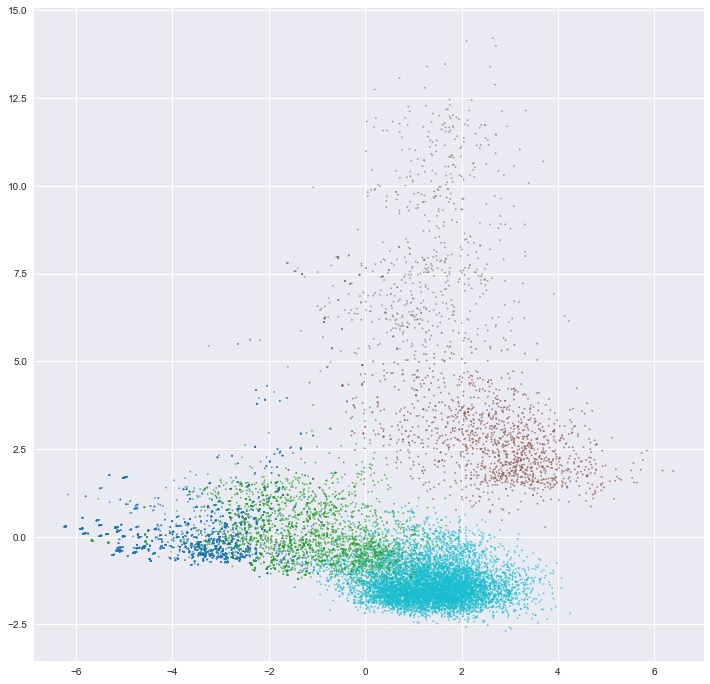

In [25]:
# Initialize the pca with 2 components and fit and transform the original dataset
pca = PCA(n_components=2)
x_new = pca.fit_transform(x_cols)

# Create df with the principal components and assign column names
pca_df = pd.DataFrame(x_new, columns=['x', 'y'])

# Join both df together
customer_seg = kmeans_df.join(pca_df)

fig = plt.figure(figsize=(12, 12))
plt.scatter('x', 'y', c='cluster_id', data=customer_seg, alpha=0.7, s=2, cmap='tab10')
plt.show()

Comparing clusters with some variables to understand customer segments main attributes.

In [27]:
# Reset index in original dataset
dfo.reset_index(inplace=True)
dfo.drop(['index'], axis=1, inplace=True)

# Adds cluster labels to original dataset
dfo_cat_labeled = dfo.select_dtypes(exclude='float64').join(kmeans_df)
dfo_num_labeled = dfo.select_dtypes(include='float64').join(kmeans_df)

In [28]:
# Group observations by cluster label and aggregate for most common value in categories
segments_df_cat = dfo_cat_labeled.groupby(by='cluster_id').agg(lambda x:x.value_counts().index[0])

# Group observations by cluster label and aggregate for mean value in numerical columns
segments_df_num = dfo_num_labeled.groupby(by='cluster_id').mean()

In [29]:
segments_df_cat.T

cluster_id,0,1,2,3,4
ArrivalDateMonth,September,October,August,June,August
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,2,2,1,1,2
Meal,BB,BB,BB,BB,BB
Country,National,National,National,National,Other_Europe
MarketSegment,Groups,Offline TA/TO,Direct,Corporate,Online TA
DistributionChannel,TA/TO,TA/TO,Direct,Corporate,TA/TO
IsRepeatedGuest,0,0,0,0,0
PreviousCancellations,0,0,0,0,0
PreviousBookingsNotCanceled,0,0,0,0,0


In [30]:
segments_df_num.T

cluster_id,0,1,2,3,4
LeadTime,203.784283,128.139503,47.995617,30.313117,83.780982
Adults,1.821190,1.728591,1.780131,1.214386,1.985513
Children,0.000000,0.010704,0.120526,0.012694,0.108258
Babies,0.000000,0.001727,0.013148,0.002821,0.004478
ADR,88.552825,90.679099,114.910058,77.345755,119.577566
